# The Patents API: Features Overview

This tutorial provides an overview of the [Patents data source](https://docs.dimensions.ai/dsl/datasource-patents.html) available via the [Dimensions Analytics API](https://docs.dimensions.ai/dsl/). 

The topics covered in this notebook are:

* How to retrieve patents metadata using the [search fields](https://docs.dimensions.ai/dsl/datasource-patents.html) available
* How to use the [schema API](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api) to obtain some statistics about the Patents data available (note: the charts generated in this section are also available online: [patents fields overview ](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patents-fields-overview.html) | [yearly distribution of patents fields](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patents-fields-by-year-count.html) ).

## Prerequisites

This notebook assumes you have installed the [Dimcli](https://pypi.org/project/dimcli/) library and are familiar with the *Getting Started* tutorial.


In [1]:
!pip install dimcli plotly tqdm -U --quiet 

import dimcli
from dimcli.shortcuts import *
import sys, json, time
from tqdm.notebook import tqdm as progress
import pandas as pd
import plotly.express as px
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#

print("==\nLogging in..")
# https://github.com/digital-science/dimcli#authentication
ENDPOINT = "https://app.dimensions.ai"
if 'google.colab' in sys.modules:
  import getpass
  USERNAME = getpass.getpass(prompt='Username: ')
  PASSWORD = getpass.getpass(prompt='Password: ')    
  dimcli.login(USERNAME, PASSWORD, ENDPOINT)
else:
  USERNAME, PASSWORD  = "", ""
  dimcli.login(USERNAME, PASSWORD, ENDPOINT)
dsl = dimcli.Dsl()

==
Logging in..
Dimcli - Dimensions API Client (v0.7.4.2)
Connected to: https://app.dimensions.ai - DSL v1.27
Method: dsl.ini file


## 1. Sample Patents Queries

For the following queries, we will restrict our search using the keyword `nanotubes`. You can of course change that, so to explore other topics too.

In [2]:
TOPIC = "nanotubes" #@param {type: "string"}

### Searching patents by keyword

We can easily discover patents mentioning the keyword `nanotubes` and sorting them by most recent first. 

In [3]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return patents[basics+jurisdiction+legal_status] 
    sort by publication_date limit 200
""").as_dataframe()

Returned Patents: 200 (total = 33641)
Time: 0.89s


In [4]:
df.head(3)

,year,assignee_names,jurisdiction,assignees,title,publication_date,id,legal_status,filing_status,inventor_names,granted_year
0,2019,[ROBERT BOSCH GMBH],WO,"[{'id': 'grid.6584.f', 'name': 'Robert Bosch (...",METHOD FOR PRODUCING A PRECURSOR MATERIAL FOR ...,2020-06-11,WO-2020115040-A1,Granted,Application,"[BAUER, HARALD, WEYDANZ, WOLFGANG]",NaN
1,2018,"[Universidad de Chile, UNIVERSIDAD DE CHILE]",US,"[{'id': 'grid.443909.3', 'name': 'University o...",SYSTEM FOR THE PRODUCTION OF CARBON NANOTUBES ...,2020-06-11,US-20200180961-A1,Pending,Application,"[Francisco GRACIA CAROCA, Mauricio MOREL ESCOB...",NaN
2,2019,[INDIAN INSTITUTE OF TECHNOLOGY MADRAS (IIT Ma...,WO,"[{'id': 'grid.417969.4', 'name': 'Indian Insti...",Fe/Fe3C ENCAPSULATED N-CNT ELECTRODE FOR ELECT...,2020-06-11,WO-2020115758-A1,Granted,Application,"[RAMAPRABHU, SUNDARA, GHOSH, Sreetama, GARAPAT...",NaN


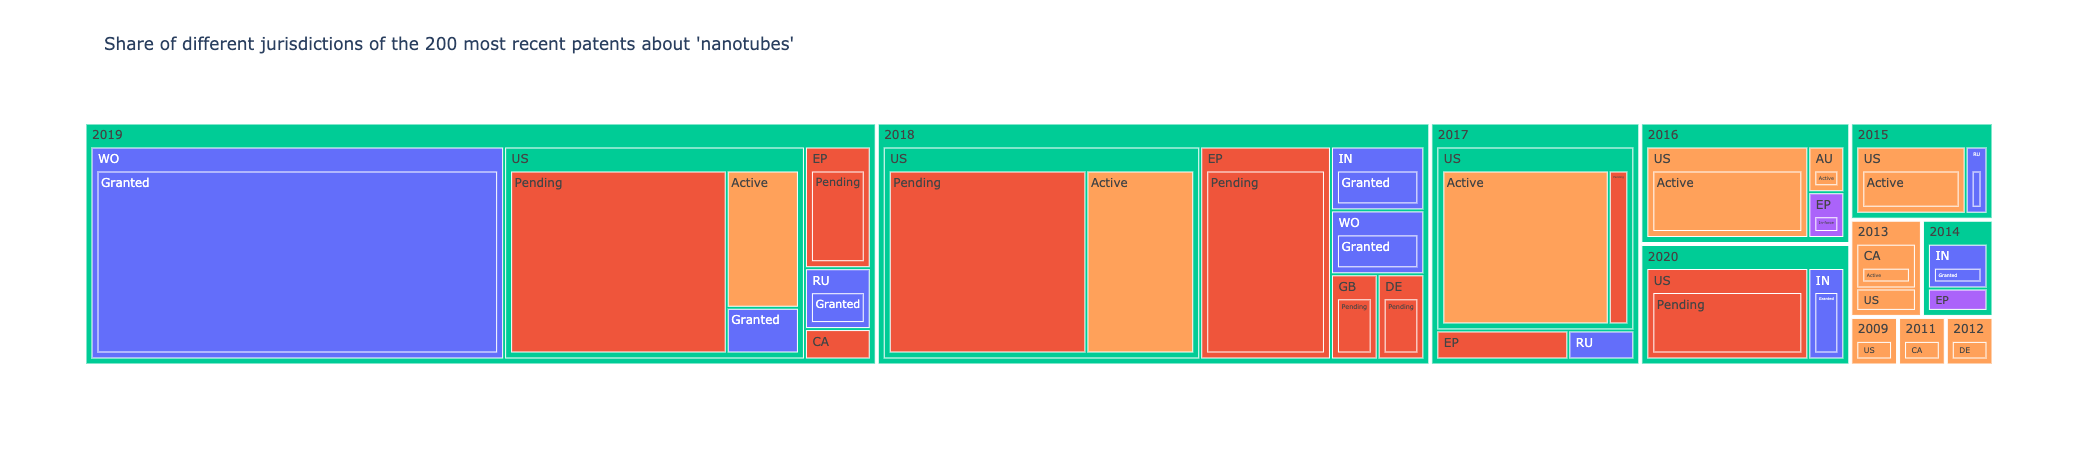

In [5]:
temp = df.copy()
temp['tot'] = 1
px.treemap(
    temp, 
    path=['year', 'jurisdiction' ,'legal_status'], 
    color="legal_status",
    values='tot',
    title=f"Share of different jurisdictions of the 200 most recent patents about '{TOPIC}'"
)

### Searching using fielded search

We can search for Patents by using one or more [field filters](https://docs.dimensions.ai/dsl/datasource-patents.html#patents-fields). 

For example, we can filter by `legal_status`, to get only the 'active' patents.

In [6]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where legal_status = "Active"
return patents[basics+jurisdiction+legal_status] 
    sort by publication_date limit 200
""").as_dataframe()
df.head()

Returned Patents: 200 (total = 5587)
Time: 0.86s


,granted_year,title,filing_status,publication_date,inventor_names,id,assignees,legal_status,year,jurisdiction,assignee_names
0,2020,Textiles including carbon nanotubes,Grant,2020-06-09,"[Abram L. Falk, Shu-Jen Han, Bharat Kumar]",US-10676862-B2,"[{'id': 'grid.410484.d', 'city_name': 'Armonk'...",Active,2019,US,"[International Business Machines Corp, INTERNA..."
1,2020,Separation of semi-conducting and metallic sin...,Grant,2020-06-09,"[Wieland REIS, Alexander Kraus, Jules Mikhael,...",US-10676360-B2,NaN,Active,2015,US,"[Clap Co Ltd, CLAP CO., LTD.]"
2,2020,Method for making carbon nanotubes,Grant,2020-06-09,"[JIANG-TAO WANG, Peng Liu, Kai-Li Jiang, Shou-...",US-10676359-B2,"[{'id': 'grid.12527.33', 'city_name': 'Beijing...",Active,2018,US,"[Tsinghua University, Hon Hai Precision Indust..."
3,2020,Method and reagent for improving yield of sele...,Grant,2020-06-09,"[Qingwen Li, Dan Liu, Song Qiu, Jin Zhang, Heh...",US-10676361-B2,"[{'id': 'grid.458499.d', 'city_name': 'Suzhou'...",Active,2017,US,[Suzhou Institute of Nano Tech and Nano Bionic...
4,2020,Method of manufacturing stacked SiGe nanotubes,Grant,2020-06-09,"[Juntao Li, Kangguo Cheng, ChoongHyun Lee]",US-10680063-B2,"[{'id': 'grid.410484.d', 'city_name': 'Armonk'...",Active,2018,US,"[International Business Machines Corp, INTERNA..."


#### Searching using dates

In [7]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where granted_date is not empty
return patents[id+title+expiration_date+granted_date+publication_date+legal_status+jurisdiction] 
    sort by granted_date limit 200
""").as_dataframe()
df.head()

Returned Patents: 200 (total = 8895)
Time: 0.85s


,granted_date,jurisdiction,title,publication_date,id,legal_status,expiration_date
0,2020-06-10,EP,FILTERING ARTICLE CONTAINING TITANIA NANOTUBES,2020-06-10,EP-2953704-B1,In-force,2034-02-04
1,2020-06-10,EP,NANOTUBE THERMOELECTRIC GENERATOR LATENT-HEAT ...,2020-06-10,EP-3353817-B1,In-force,2036-09-17
2,2020-06-09,US,Textiles including carbon nanotubes,2020-06-09,US-10676862-B2,Active,2037-04-25
3,2020-06-09,US,Separation of semi-conducting and metallic sin...,2020-06-09,US-10676360-B2,Active,2036-09-01
4,2020-06-09,US,Method for making carbon nanotubes,2020-06-09,US-10676359-B2,Active,2038-07-03


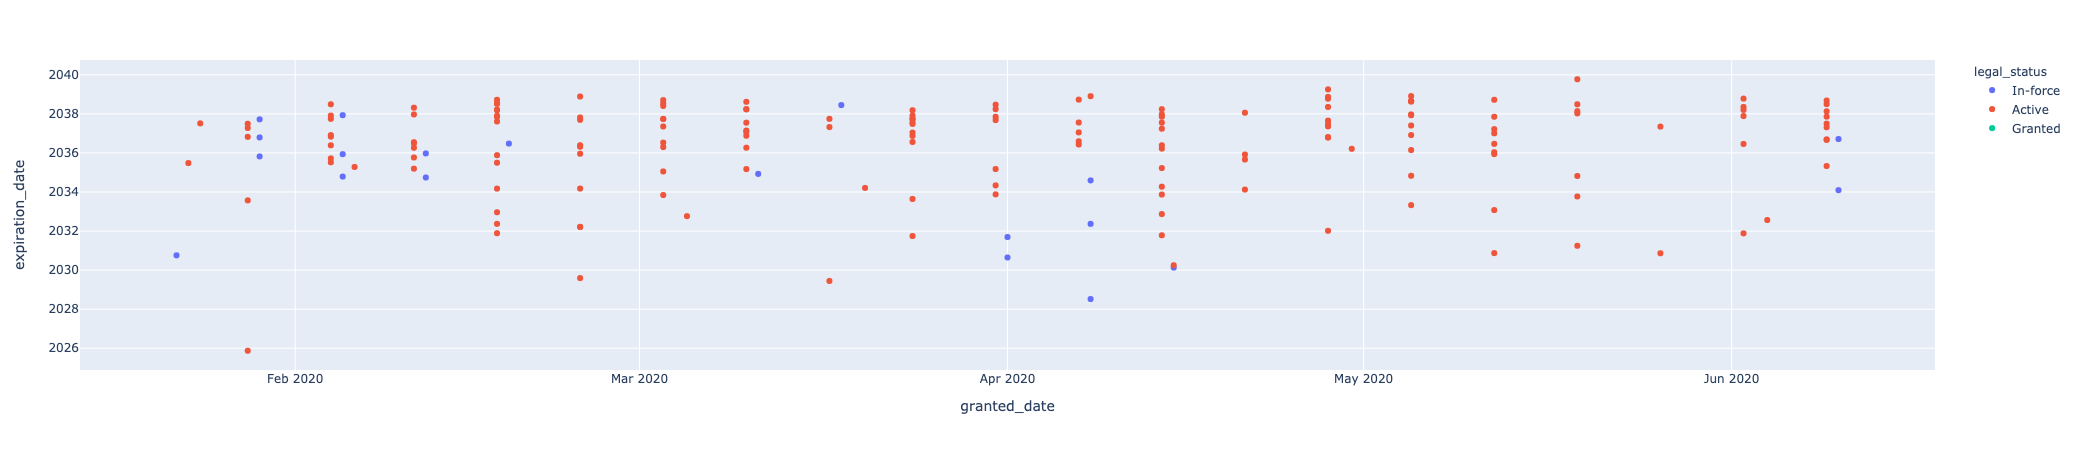

In [8]:
px.scatter(df, 
          x="granted_date", y="expiration_date", 
           hover_name="title",
           color="legal_status")

### Extracting cited publications via `publication_ids`

In [9]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where publication_ids is not empty
return patents[basics+publication_ids] 
    sort by publication_date limit 100
""").as_dataframe()
df.head()

Returned Patents: 100 (total = 6367)
Time: 0.82s


,assignee_names,id,year,granted_year,times_cited,publication_date,assignees,publication_ids,title,inventor_names,filing_status
0,"[Toyoto Motor Europe Nv/sa, Toyota Motor Europ...",US-10090531-B2,2013,2018.0,0.0,2018-10-02,"[{'id': 'grid.426284.e', 'country_name': 'Belg...","[pub.1016500470, pub.1009165374, pub.101153508...",Vertically aligned titanium oxide nanotubes fo...,"[Isotta Cerri, Julien ROUSSEL]",Grant
1,"[Boeing Co, BOEING CO]",US-10091916-B2,2016,2018.0,0.0,2018-10-02,"[{'id': 'grid.423121.7', 'country_name': 'Unit...","[pub.1056216743, pub.1019936883, pub.105009437...",Fabrication of ceramic matrix composites with ...,"[Daniel Joseph Braley, John H. Belk]",Grant
2,[Sungkyunkwan University Research and Business...,US-10087078-B2,2012,2018.0,0.0,2018-10-02,"[{'id': 'grid.264381.a', 'country_name': 'Sout...","[pub.1109698761, pub.1033215285, pub.1043081830]","Dispersing method of carbon nanotube, dispersi...","[Dong Hyun Lee, Seung Yong Son]",Grant
3,"[FGV CAMBRIDGE NANOSYSTEMS Ltd, FGV CAMBRIDGE ...",US-10087077-B2,2014,2018.0,NaN,2018-10-02,NaN,"[pub.1020683748, pub.1060820716, pub.104649130...","Method, system and injection subsystem for pro...","[Krzysztof Kazimierz Koziol, Jerome Yi-Zhe JOA...",Grant
4,[King Fahd University of Petroleum and Mineral...,US-10090078-B2,2016,2018.0,NaN,2018-10-02,"[{'id': 'grid.412135.0', 'country_name': 'Saud...","[pub.1037943947, pub.1055142391, pub.101094548...",Nanocomposite films and methods of preparation...,"[Mamdouh Ahmed Al-Harthi, Osamah Awadh Bin-Dah...",Grant


In [10]:
pubs = df.explode('publication_ids').drop_duplicates(subset='publication_ids')['publication_ids'].to_list()
print(len(pubs), "publications found")

524 publications found


Let's get the pubs metadata for some of them:

In [11]:
df = dsl.query(f"""
search publications
    where id in {json.dumps(pubs[:200])}
return publications[id+doi+title+year] 
    limit 1000
""").as_dataframe()
df.head()

Returned Publications: 199 (total = 199)
Time: 0.89s


,id,title,year,doi
0,pub.1043081830,Effective disentangling method of bundled mult...,2017,10.1016/j.jiec.2016.09.030
1,pub.1050094377,High electrical conductivity and anisotropy of...,2016,10.1016/j.scriptamat.2016.06.023
2,pub.1005372942,Carbon nanotube buckypaper-reinforced SiCN cer...,2016,10.1016/j.jeurceramsoc.2016.02.045
3,pub.1004949819,Novel Hybrid Organic Thermoelectric Materials:...,2015,10.1002/adma.201405463
4,pub.1001689198,Water and wastewater treatment from BTEX by ca...,2014,10.1134/s0097807814060037


### Extracting cited patents via `reference_ids`

In [12]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where publication_ids is not empty
return patents[basics+reference_ids] 
    sort by publication_date limit 100
""").as_dataframe()
df.head()

Returned Patents: 100 (total = 6367)
Time: 4.07s


,filing_status,publication_date,inventor_names,year,id,reference_ids,assignee_names,assignees,granted_year,times_cited,title
0,Grant,2018-10-02,"[Isotta Cerri, Julien ROUSSEL]",2013,US-10090531-B2,"[CN-101537350-A, CN-101560669-A, CN-102916199-...","[Toyoto Motor Europe Nv/sa, Toyota Motor Europ...","[{'id': 'grid.426284.e', 'city_name': 'Brussel...",2018.0,0.0,Vertically aligned titanium oxide nanotubes fo...
1,Grant,2018-10-02,"[Daniel Joseph Braley, John H. Belk]",2016,US-10091916-B2,"[CN-103288466-B, US-20140313636-A1, US-2015033...","[Boeing Co, BOEING CO]","[{'id': 'grid.423121.7', 'city_name': 'Chicago...",2018.0,0.0,Fabrication of ceramic matrix composites with ...
2,Grant,2018-10-02,"[Dong Hyun Lee, Seung Yong Son]",2012,US-10087078-B2,"[JP-2008013415-A, KR-100753539-B1, KR-10079259...",[Sungkyunkwan University Research and Business...,"[{'id': 'grid.264381.a', 'city_name': 'Seoul',...",2018.0,0.0,"Dispersing method of carbon nanotube, dispersi..."
3,Grant,2018-10-02,"[Krzysztof Kazimierz Koziol, Jerome Yi-Zhe JOA...",2014,US-10087077-B2,"[CN-100526217-C, CN-102115075-A, GB-2485339-A,...","[FGV CAMBRIDGE NANOSYSTEMS Ltd, FGV CAMBRIDGE ...",NaN,2018.0,NaN,"Method, system and injection subsystem for pro..."
4,Grant,2018-10-02,"[Mamdouh Ahmed Al-Harthi, Osamah Awadh Bin-Dah...",2016,US-10090078-B2,"[KR-101209293-B1, KR-101374273-B1, KR-10139115...",[King Fahd University of Petroleum and Mineral...,"[{'id': 'grid.412135.0', 'city_name': 'Dhahran...",2018.0,NaN,Nanocomposite films and methods of preparation...


In [13]:
cited_patents = df.explode('reference_ids').drop_duplicates(subset='reference_ids')['reference_ids'].to_list()
print(len(cited_patents), "cited patents found")

1673 cited patents found


### Aggregating results using facets

Patents results can be grouped using facets. E.g. we can see what are the top `assignees`, `researchers` or  `category_for` related to our patents (note: the column 'count' represents the number of patent records in each of the groups).

#### Top assignees

In [14]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return assignees limit 100
""").as_dataframe()
df.head()

Returned Assignees: 100
Time: 0.56s


,id,count,country_name,city_name,name,acronym
0,grid.471047.1,2108,Taiwan,Banqiao District,Foxconn (Taiwan),NaN
1,grid.12527.33,1974,China,Beijing,Tsinghua University,THU
2,grid.419666.a,970,South Korea,Seoul,Samsung (South Korea),NaN
3,grid.410484.d,853,United States,Armonk,IBM (United States),NaN
4,grid.21940.3e,688,United States,Houston,Rice University,NaN


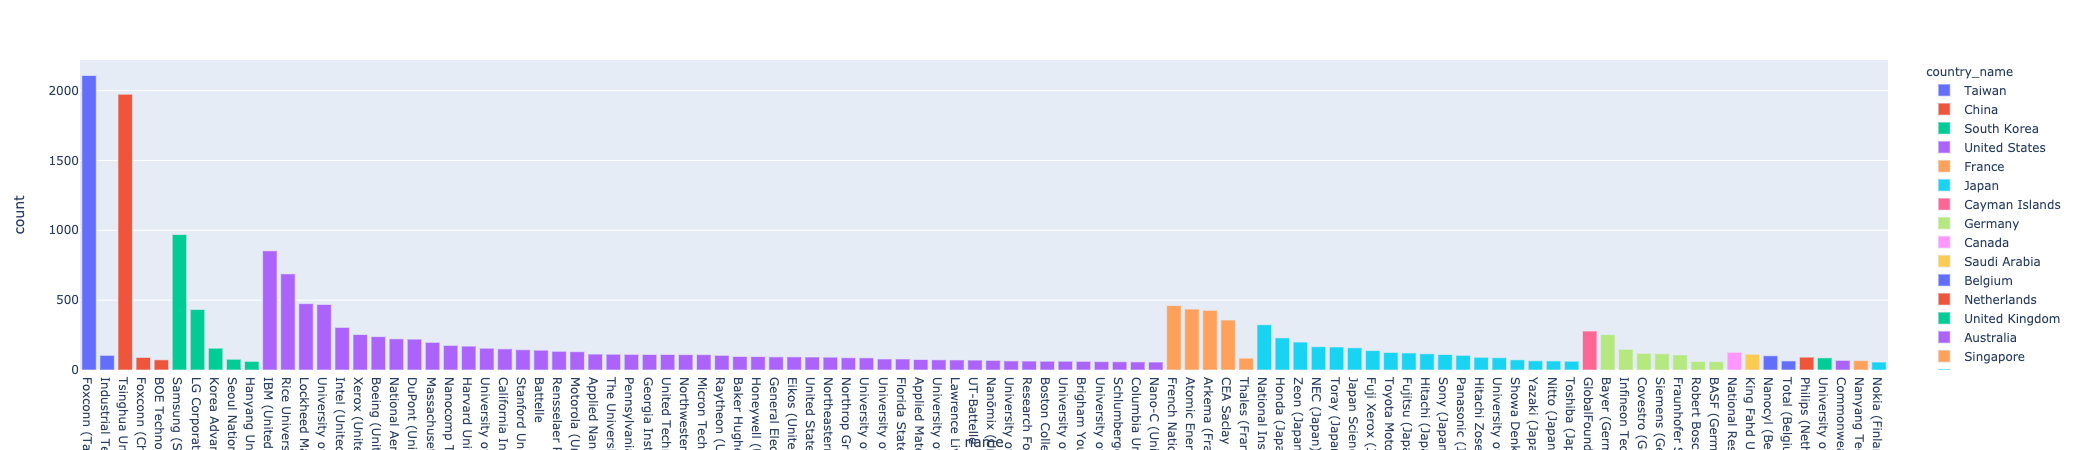

In [15]:
px.bar(df, x="name", y="count", color="country_name")

#### Top researchers

In [16]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return researchers limit 100
""").as_dataframe()
df.head()

Returned Researchers: 100
Time: 0.65s


,id,count,first_name,last_name,research_orgs,orcid_id
0,ur.01013717360.95,1591,Shou-Shan,Fan,"[grid.12527.33, grid.168010.e, grid.20513.35, ...",NaN
1,ur.01327532251.18,995,Kai-Li,Jiang,"[grid.11135.37, grid.12527.33, grid.495569.2]",[0000-0002-1547-5848]
2,ur.01336230527.99,225,Qun-Qing,Li,"[grid.194645.b, grid.12527.33, grid.41156.37, ...",[0000-0001-9565-0855]
3,ur.015715035461.24,155,NaN,Not available,NaN,NaN
4,ur.014455217473.46,128,Jiaping,Wang,[grid.12527.33],NaN


#### Top FOR categories

In [17]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return category_for limit 100
""").as_dataframe()
df.head()

Returned Category_for: 94
Time: 5.60s


,id,count,name
0,2209,14217,09 Engineering
1,2203,11227,03 Chemical Sciences
2,2921,9655,0912 Materials Engineering
3,2471,7846,0306 Physical Chemistry (incl. Structural)
4,2210,7142,10 Technology


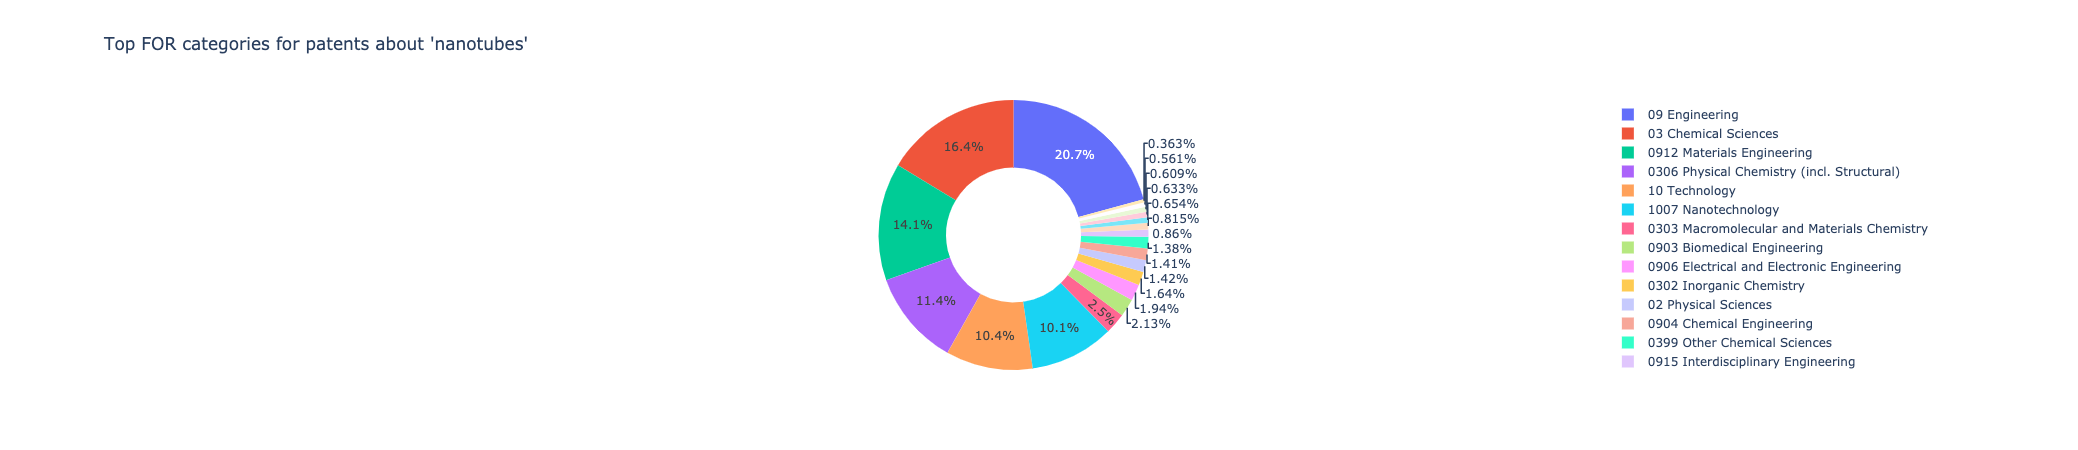

In [18]:
px.pie(df[:20], names="name", values="count", hole=0.5,
       title=f"Top FOR categories for patents about '{TOPIC}'")

## 2. A closer look at Patents statistics

The Dimensions Search Language [exposes programmatically metadata](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api), such as supported sources and entities, along with their fields, facets, fieldsets, metrics and search fields. 


In [19]:
%dsldocs patents

,sources,field,type,description,is_filter,is_entity,is_facet
0,patents,abstract,string,Abstract or description of the patent.,False,False,False
1,patents,additional_filters,string,"Additional filters describing the patents, e.g...",True,False,False
2,patents,assignee_cities,cities,"City of the assignees of the patent, expressed...",True,True,True
3,patents,assignee_countries,countries,"Country of the assignees of the patent, expres...",True,True,True
4,patents,assignee_names,string,"Name of assignees of the patent, as they appea...",True,False,False
5,patents,assignee_state_codes,states,"State of the assignee, expressed using GeoName...",True,True,True
6,patents,assignees,organizations,Disambiguated GRID organisations who own or ha...,True,True,True
7,patents,associated_grant_ids,string,Dimensions IDs of the grants associated to the...,True,False,False
8,patents,category_bra,categories,`Broad Research Areas <https://dimensions.fres...,True,True,True
9,patents,category_for,categories,`ANZSRC Fields of Research classification <htt...,True,True,True


The fields list shown above can be extracted via the following DSL query:

In [20]:
data = dsl.query("""describe source patents""")
fields = sorted([x for x in data.fields.keys()])

### Counting records per each field

By using the fields list obtained above, it is possible to draw up some general statistics re. the Patents content type in Dimensions.

In order to do this, we  use the operator `is not empty` to generate automatically queries like this `search patents where {field_name} is not empty return patents limit 1` and then use the `total_count` field in the JSON we get back for our statistics. 

In [21]:
q_template = """search patents where {} is not empty return patents[id] limit 1"""

# seed results with total number of orgs
total = dsl.query("""search patents return patents[id] limit 1""", verbose=False).count_total
stats = [
    {'filter_by': 'no filter (=all records)', 'results' : total}
]

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False)
    time.sleep(0.5)
    stats.append({'filter_by': f, 'results' : res.count_total})


df = pd.DataFrame().from_dict(stats)
df.sort_values("results", inplace=True, ascending=False)
df

,filter_by,results
0,no filter (=all records),40559786
46,title,40559786
39,publication_date,40559786
34,legal_status,40559786
33,jurisdiction,40559786
30,id,40559786
25,filing_status,40559786
23,dimensions_url,40559786
41,publication_year,40559729
21,date,40521741


### Creating a bar chart

> NOTE: a standalone version of this chart is also [available online](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patent-fields-overview.html)

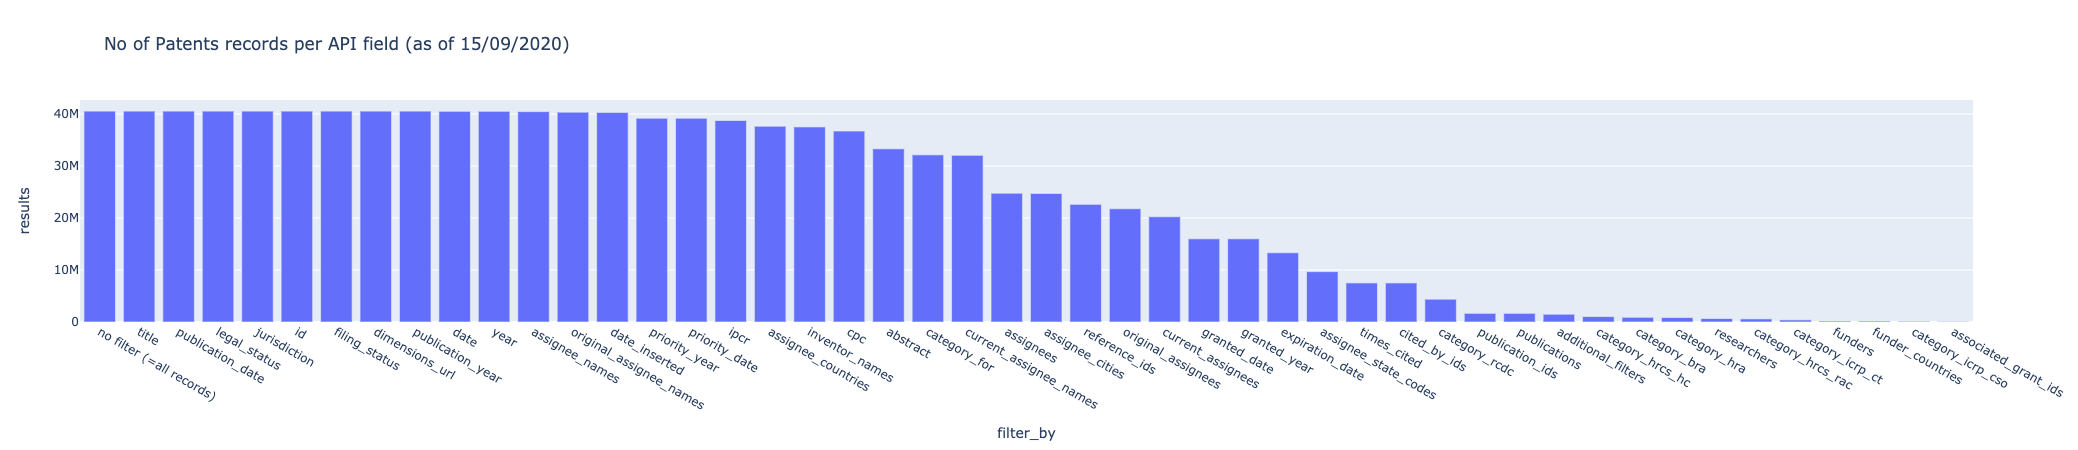

In [22]:
from datetime import date
today = date.today().strftime("%d/%m/%Y")

from plotly.offline import plot
fig = px.bar(df, x=df['filter_by'], y=df['results'],
             title=f"No of Patents records per API field (as of {today})")
plot(fig, filename = 'patents-fields-overview.html', auto_open=False)
fig.show()

### Counting the yearly distribution of field/records data 



In [23]:
#
# get how many records have values for each field, for each year
#

q_template = """search patents where {} is not empty return year limit 150"""

# seed with all records data (no filter)
seed = dsl.query("""search patents return year limit 150""", verbose=False).as_dataframe()
seed['segment'] = "all records"

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False).as_dataframe()
    res['segment'] = f
    seed = seed.append(res, ignore_index=True )
    time.sleep(0.5)

seed = seed.rename(columns={'id' : 'year'})
seed = seed.astype({'year': 'int32'})

#
# fill in (normalize) missing years in order to build a line chart
#

yrange = [seed['year'].min(), seed['year'].max()]
# TIP yrange[1]+1 to make sure max value is included
all_years = [x for x in range(yrange[0], yrange[1]+1)]  

def add_missing_years(field_name):
    global seed
    known_years = list(seed[seed["segment"] == field_name]['year'])
    l = [] 
    for x in all_years:
        if x not in known_years:
            l.append({'segment' : field_name , 'year' : x, 'count': 0 })
    seed = seed.append(l, ignore_index=True )
    
all_field_names = seed['segment'].value_counts().index.tolist()
for field in all_field_names:
    add_missing_years(field)
    

### Creating a line chart 

> NOTE: a standalone version of this chart is also [available online](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patent-fields-by-year-count.html)

A few things to remember: 

* There are a lot of overlapping lines, as many fields appear frequently; hence it's useful to click on the right panel to hide/reveal specific segments.  
* We set a start year to avoid having a long tail of (very few) patents published a long time ago. 

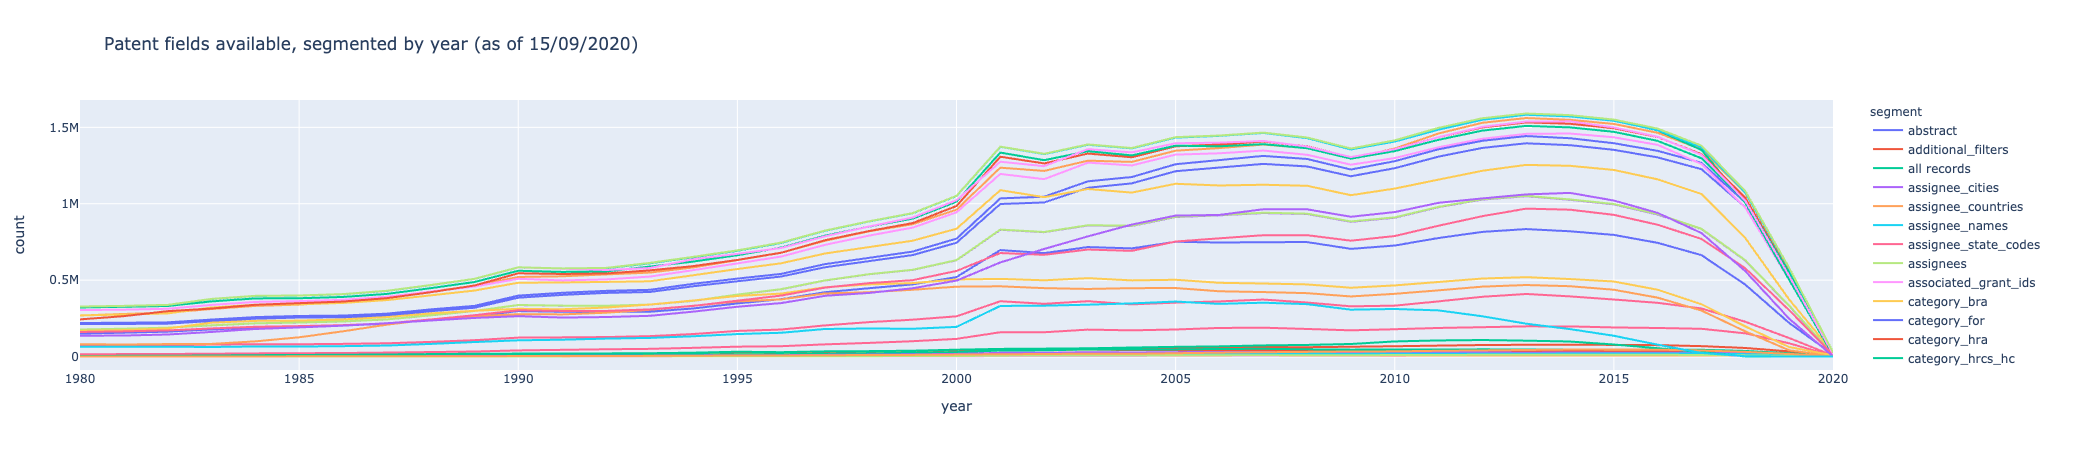

In [24]:
start_year = 1980

# need to sort otherwise the chart is messed up!
temp = seed.query(f"year >= {start_year}").sort_values(["segment", "year"]) 
# 
fig = px.line(temp, x="year", y="count", color="segment",
               title=f"Patent fields available, segmented by year (as of {today})")
plot(fig, filename = 'patents-fields-by-year-count.html', auto_open=False)
fig.show()

## Where to find out more



Please have a look at the [official documentation](https://docs.dimensions.ai/dsl/datasource-patents.html) for more information on Patents.